In [2]:
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud,STOPWORDS
from nltk.tokenize import word_tokenize

In [3]:
drugs="drugsCom_raw.tsv"
drugs_data=pd.read_table(drugs,sep='\t')
drugs_data

Unnamed: 0                  drugName                     condition  \
0           206461                 Valsartan  Left Ventricular Dysfunction   
1            95260                Guanfacine                          ADHD   
2            92703                    Lybrel                 Birth Control   
3           138000                Ortho Evra                 Birth Control   
4            35696  Buprenorphine / naloxone             Opiate Dependence   
...            ...                       ...                           ...   
161292      191035                   Campral            Alcohol Dependence   
161293      127085            Metoclopramide               Nausea/Vomiting   
161294      187382                   Orencia          Rheumatoid Arthritis   
161295       47128        Thyroid desiccated           Underactive Thyroid   
161296      215220              Lubiprostone         Constipation, Chronic   

                                                   review  rating  \
0       "It has no side effect, I take it in combinati...     9.0   
1       "My son is halfway through his fourth week of ...     8.0   
2       "I used to take another oral contraceptive, wh...     5.0   
3       "This is my first time using any form of birth...     8.0   
4       "Suboxone has completely turned my life around...     9.0   
...                                                   ...     ...   
161292  "I wrote my first report in Mid-October of 201...    10.0   
161293  "I was given this in IV before surgey. I immed...     1.0   
161294  "Limited improvement after 4 months, developed...     2.0   
161295  "I&#039;ve been on thyroid medication 49 years...    10.0   
161296  "I&#039;ve had chronic constipation all my adu...     9.0   

                      date  usefulCount  
0             May 20, 2012           27  
1           April 27, 2010          192  
2        December 14, 2009           17  
3         November 3, 2015           10  
4        November 27, 2016           37  
...                    ...          ...  
161292        May 31, 2015          125  
161293    November 1, 2011           34  
161294      March 15, 2014           35  
161295  September 19, 2015           79  
161296   December 13, 2014          116  

[161297 rows x 7 columns]

In [4]:
drugs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   161297 non-null  int64  
 1   drugName     161297 non-null  object 
 2   condition    160398 non-null  object 
 3   review       161297 non-null  object 
 4   rating       161297 non-null  float64
 5   date         161297 non-null  object 
 6   usefulCount  161297 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB


In [5]:
drugs_data.describe()

Unnamed: 0         rating    usefulCount
count  161297.000000  161297.000000  161297.000000
mean   115923.585305       6.994377      28.004755
std     67004.445170       3.272329      36.403742
min         2.000000       1.000000       0.000000
25%     58063.000000       5.000000       6.000000
50%    115744.000000       8.000000      16.000000
75%    173776.000000      10.000000      36.000000
max    232291.000000      10.000000    1291.000000

In [6]:
drugs_data.isnull().any()

Unnamed: 0     False
drugName       False
condition       True
review         False
rating         False
date           False
usefulCount    False
dtype: bool

In [7]:
drugs_data.isnull().sum()

Unnamed: 0       0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [8]:
drugs_data.dropna(inplace=True)

In [9]:
drugs_data.isnull().sum()

Unnamed: 0     0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

In [10]:
def SIDE_EFFECTS(row):
    if row['rating'] < 4:
        return ("severe side effect")
    elif row['rating'] >= 4 and row['rating'] < 8:
        return ("mild side effect")
    else:
        return ("no side effect")

drugs_data['SIDE_EFFECTS'] = drugs_data.apply(SIDE_EFFECTS, axis=1)
drugs_data.head()

Unnamed: 0                  drugName                     condition  \
0      206461                 Valsartan  Left Ventricular Dysfunction   
1       95260                Guanfacine                          ADHD   
2       92703                    Lybrel                 Birth Control   
3      138000                Ortho Evra                 Birth Control   
4       35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating  \
0  "It has no side effect, I take it in combinati...     9.0   
1  "My son is halfway through his fourth week of ...     8.0   
2  "I used to take another oral contraceptive, wh...     5.0   
3  "This is my first time using any form of birth...     8.0   
4  "Suboxone has completely turned my life around...     9.0   

                date  usefulCount      SIDE_EFFECTS  
0       May 20, 2012           27    no side effect  
1     April 27, 2010          192    no side effect  
2  December 14, 2009           17  mild side effect  
3   November 3, 2015           10    no side effect  
4  November 27, 2016           37    no side effect

In [11]:
drugs_data.columns

Index(['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount', 'SIDE_EFFECTS'],
      dtype='object')

In [12]:
drugs_data["drugName"] = drugs_data["drugName"].str.replace(r'\W',"")
drugs_data.head()

Unnamed: 0               drugName                     condition  \
0      206461              Valsartan  Left Ventricular Dysfunction   
1       95260             Guanfacine                          ADHD   
2       92703                 Lybrel                 Birth Control   
3      138000              OrthoEvra                 Birth Control   
4       35696  Buprenorphinenaloxone             Opiate Dependence   

                                              review  rating  \
0  "It has no side effect, I take it in combinati...     9.0   
1  "My son is halfway through his fourth week of ...     8.0   
2  "I used to take another oral contraceptive, wh...     5.0   
3  "This is my first time using any form of birth...     8.0   
4  "Suboxone has completely turned my life around...     9.0   

                date  usefulCount      SIDE_EFFECTS  
0       May 20, 2012           27    no side effect  
1     April 27, 2010          192    no side effect  
2  December 14, 2009           17  mild side effect  
3   November 3, 2015           10    no side effect  
4  November 27, 2016           37    no side effect

In [13]:
drug = ' '.join(drugs_data['drugName'].tolist())
drug

'Valsartan Guanfacine Lybrel OrthoEvra Buprenorphinenaloxone Cialis Levonorgestrel Aripiprazole Keppra Ethinylestradiollevonorgestrel Topiramate Lmethylfolate Pentasa Dextromethorphan Nexplanon Liraglutide Trimethoprim Amitriptyline Lamotrigine Nilotinib Atripla Trazodone Etonogestrel Etanercept Tioconazole Azithromycin Eflornithine Daytrana Ativan Imitrex Sertraline Toradol Tioconazole Viberzi Mobic Dulcolax Morphine MoviPrep Trilafon Fluconazole Contrave Clonazepam Metaxalone Venlafaxine Ledipasvirsofosbuvir Ledipasvirsofosbuvir Symbyax Tamsulosin Doxycycline Dulaglutide Intuniv Buprenorphine Qvar Opdivo Aripiprazole Pyridium Latuda Bupropion Implanon EffexorXR Drospirenoneethinylestradiol Buprenorphine Implanon NuvaRing Prepopik Tretinoin EffexorXR GildessFe120 Ethinylestradiolnorgestimate Elbasvirgrazoprevir Clomiphene Docusatesenna Amitiza Etonogestrel Nexplanon Sildenafil LoLoestrinFe Ledipasvirsofosbuvir Sertraline Oxcarbazepine Wellbutrin NuvaRing Levonorgestrel PhillipsMilkofM

In [14]:
drugs_data['drugName'].value_counts()

Levonorgestrel                   3631
Etonogestrel                     3321
Ethinylestradiolnorethindrone    2750
Nexplanon                        2156
Ethinylestradiolnorgestimate     2033
                                 ... 
Colace                              1
DermaZincShampoo                    1
Lillow                              1
Magaldratesimethicone               1
GrifulvinV                          1
Name: drugName, Length: 3431, dtype: int64

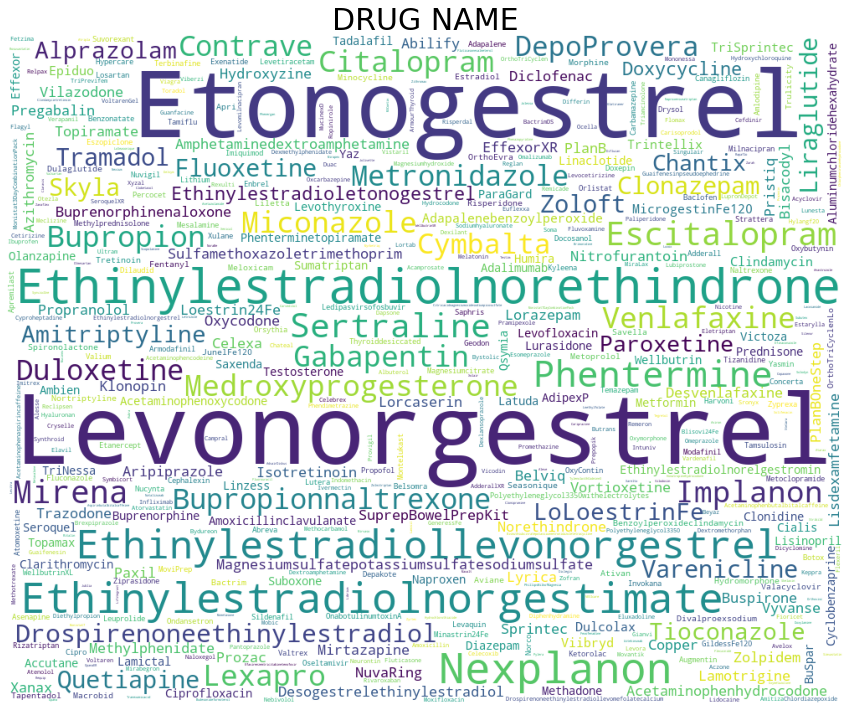

In [15]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'white', stopwords = stopwords, max_words = 500, width = 1000, height = 800).generate(str(drug))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('DRUG NAME', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [16]:
drugs_data["condition"] = drugs_data["condition"].str.replace(r'\W',"")
drugs_data.head()

Unnamed: 0               drugName                   condition  \
0      206461              Valsartan  LeftVentricularDysfunction   
1       95260             Guanfacine                        ADHD   
2       92703                 Lybrel                BirthControl   
3      138000              OrthoEvra                BirthControl   
4       35696  Buprenorphinenaloxone            OpiateDependence   

                                              review  rating  \
0  "It has no side effect, I take it in combinati...     9.0   
1  "My son is halfway through his fourth week of ...     8.0   
2  "I used to take another oral contraceptive, wh...     5.0   
3  "This is my first time using any form of birth...     8.0   
4  "Suboxone has completely turned my life around...     9.0   

                date  usefulCount      SIDE_EFFECTS  
0       May 20, 2012           27    no side effect  
1     April 27, 2010          192    no side effect  
2  December 14, 2009           17  mild side effect  
3   November 3, 2015           10    no side effect  
4  November 27, 2016           37    no side effect

In [17]:
drugs_data["condition"].value_counts()

BirthControl                                      28788
Depression                                         9069
Pain                                               6145
Anxiety                                            5904
Acne                                               5588
                                                  ...  
DissociativeIdentityDisorde                           1
Hydrocephalus                                         1
HyperlipoproteinemiaTypeIIIElevatedbetaVLDLIDL        1
QFeve                                                 1
Neutropenia                                           1
Name: condition, Length: 884, dtype: int64

In [18]:
condition = ' '.join(drugs_data['condition'].tolist())
condition

'LeftVentricularDysfunction ADHD BirthControl BirthControl OpiateDependence BenignProstaticHyperplasia EmergencyContraception BipolarDisorde Epilepsy BirthControl MigrainePrevention Depression CrohnsDisease Cough BirthControl Obesity UrinaryTractInfection ibromyalgia BipolarDisorde ChronicMyelogenousLeukemia HIVInfection Insomnia BirthControl RheumatoidArthritis VaginalYeastInfection ChlamydiaInfection Hirsutism ADHD PanicDisorde Migraine Depression Pain VaginalYeastInfection IrritableBowelSyndrome Osteoarthritis Constipation Pain BowelPreparation Psychosis VaginalYeastInfection Obesity PanicDisorde MuscleSpasm Depression HepatitisC HepatitisC BipolarDisorde OveractiveBladde UrinaryTractInfection DiabetesType2 ADHD Pain AsthmaMaintenance NonSmallCellLungCance Schizophrenia Dysuria BipolarDisorde SmokingCessation BirthControl Anxiety BirthControl Pain BirthControl BirthControl BowelPreparation Acne Depression BirthControl Acne HepatitisC emaleInfertility ConstipationAcute ConstipationDr

In [19]:
cond = condition.replace("BipolarDisorde","BipolarDisorder").replace("PanicDisorde","PanicDisorder").replace("MajorDepressiveDisorde ","MajorDepressiveD")

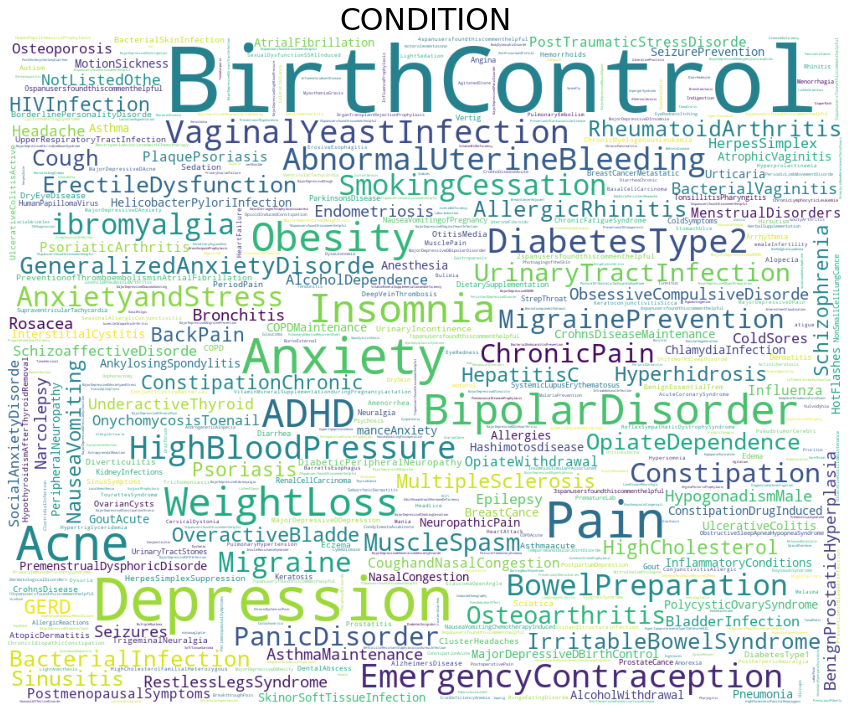

In [20]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'white', stopwords = stopwords, max_words = 500, width = 1000, height = 800).generate(str(cond))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('CONDITION', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [21]:
drugs_data["review"][16645]

'"After using 2 pumps per day for 4 months total testosterone levels dropped from 224 to 174. Worthless product."'

In [22]:
drugs_data['rating'].value_counts()

10.0    50745
9.0     27379
1.0     21504
8.0     18791
7.0      9395
5.0      7959
2.0      6879
3.0      6465
6.0      6301
4.0      4980
Name: rating, dtype: int64

In [23]:
drugs_data['review']= drugs_data['review'].apply(lambda x: " ".join(word.lower() for word in x.split()))
drugs_data.head()

Unnamed: 0               drugName                   condition  \
0      206461              Valsartan  LeftVentricularDysfunction   
1       95260             Guanfacine                        ADHD   
2       92703                 Lybrel                BirthControl   
3      138000              OrthoEvra                BirthControl   
4       35696  Buprenorphinenaloxone            OpiateDependence   

                                              review  rating  \
0  "it has no side effect, i take it in combinati...     9.0   
1  "my son is halfway through his fourth week of ...     8.0   
2  "i used to take another oral contraceptive, wh...     5.0   
3  "this is my first time using any form of birth...     8.0   
4  "suboxone has completely turned my life around...     9.0   

                date  usefulCount      SIDE_EFFECTS  
0       May 20, 2012           27    no side effect  
1     April 27, 2010          192    no side effect  
2  December 14, 2009           17  mild side effect  
3   November 3, 2015           10    no side effect  
4  November 27, 2016           37    no side effect

In [24]:
drugs_data['review']=drugs_data['review'].apply(lambda x:''.join([i for i in x  if i not in string.punctuation]))

In [25]:
drugs_data['review']=drugs_data['review'].str.replace('[0-9]','')

In [26]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
from nltk.corpus import stopwords
stop_words=stopwords.words('english')

In [28]:
drugs_data['review']=drugs_data['review'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))
drugs_data.head()

Unnamed: 0               drugName                   condition  \
0      206461              Valsartan  LeftVentricularDysfunction   
1       95260             Guanfacine                        ADHD   
2       92703                 Lybrel                BirthControl   
3      138000              OrthoEvra                BirthControl   
4       35696  Buprenorphinenaloxone            OpiateDependence   

                                              review  rating  \
0  side effect take combination bystolic mg fish oil     9.0   
1  son halfway fourth week intuniv became concern...     8.0   
2  used take another oral contraceptive pill cycl...     5.0   
3  first time using form birth control im glad we...     8.0   
4  suboxone completely turned life around feel he...     9.0   

                date  usefulCount      SIDE_EFFECTS  
0       May 20, 2012           27    no side effect  
1     April 27, 2010          192    no side effect  
2  December 14, 2009           17  mild side effect  
3   November 3, 2015           10    no side effect  
4  November 27, 2016           37    no side effect

In [29]:
from textblob import Word 

In [30]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [31]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [32]:
drugs_data['review']= drugs_data['review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [33]:
n_req= ['one','first','effect','side','taking','im','ive','mg','time','hour','could','lb','two','sideeffect','started','still','took','take','day','it']

In [34]:
drugs_data['review']=drugs_data['review'].apply(lambda x:" ".join(word for word in x.split() if word not in n_req))
drugs_data.head()

Unnamed: 0               drugName                   condition  \
0      206461              Valsartan  LeftVentricularDysfunction   
1       95260             Guanfacine                        ADHD   
2       92703                 Lybrel                BirthControl   
3      138000              OrthoEvra                BirthControl   
4       35696  Buprenorphinenaloxone            OpiateDependence   

                                              review  rating  \
0                      combination bystolic fish oil     9.0   
1  son halfway fourth week intuniv became concern...     8.0   
2  used another oral contraceptive pill cycle hap...     5.0   
3  using form birth control glad went patch month...     8.0   
4  suboxone completely turned life around feel he...     9.0   

                date  usefulCount      SIDE_EFFECTS  
0       May 20, 2012           27    no side effect  
1     April 27, 2010          192    no side effect  
2  December 14, 2009           17  mild side effect  
3   November 3, 2015           10    no side effect  
4  November 27, 2016           37    no side effect

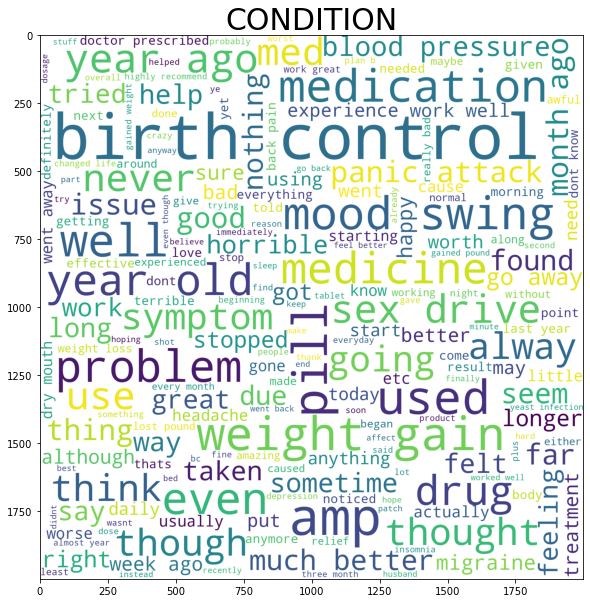

In [35]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
Review_wordcloud = ' '.join(drugs_data['review'])
wordcloud=WordCloud(
                    background_color='white',
                    width=2000,
                    height=2000
                   ).generate(Review_wordcloud)
fig = plt.figure(figsize = (10, 10))
plt.title('CONDITION', fontsize = 30)
plt.axis('on')
plt.imshow(wordcloud)

<AxesSubplot:title={'center':'RATING '}>

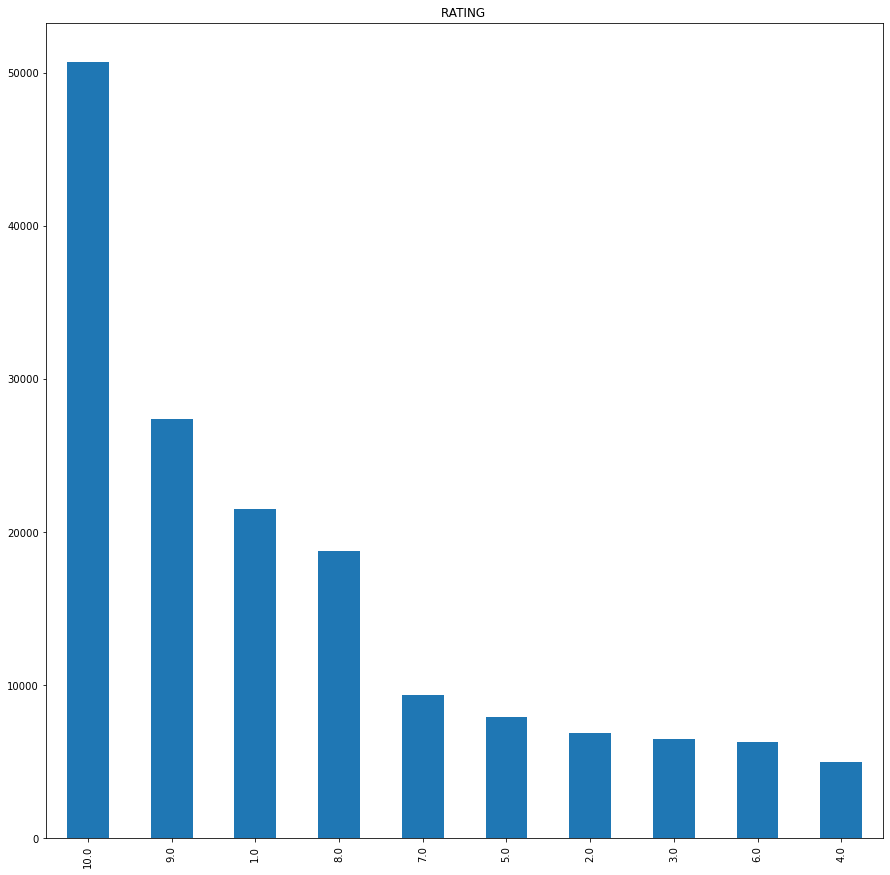

In [36]:
drugs_data['rating'].value_counts().plot(kind='bar',title='RATING ')

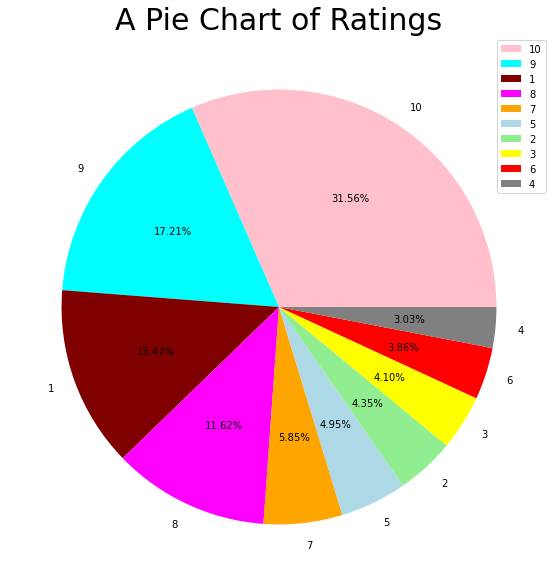

In [37]:
size = [17384, 9477, 7422, 6400, 3221, 2726, 2397, 2256,2128 , 1670]
colors = ['pink', 'cyan', 'maroon',  'magenta', 'orange', 'lightblue', 'lightgreen', 'yellow','red','gray']
labels = "10", "9", "1", "8", "7", "5","2","3","6", "4"
explode = [0, 0, 0]

my_circle = plt.Circle((0, 2), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('A Pie Chart of Ratings', fontsize = 30)
p = plt.gcf()
plt.gca().add_artist(my_circle)
plt.legend()
plt.show()

In [38]:
def REVIEW_SENTIMENT(row):
    if row['rating'] < 4:
        return ("NEGATIVE")
    elif row['rating'] >= 4 and row['rating'] < 8:
        return ("NEUTRAL")
    else:
        return ("POSITIVE")

drugs_data['REVIEW_SENTIMENT'] = drugs_data.apply(REVIEW_SENTIMENT, axis=1)
drugs_data.head()

Unnamed: 0               drugName                   condition  \
0      206461              Valsartan  LeftVentricularDysfunction   
1       95260             Guanfacine                        ADHD   
2       92703                 Lybrel                BirthControl   
3      138000              OrthoEvra                BirthControl   
4       35696  Buprenorphinenaloxone            OpiateDependence   

                                              review  rating  \
0                      combination bystolic fish oil     9.0   
1  son halfway fourth week intuniv became concern...     8.0   
2  used another oral contraceptive pill cycle hap...     5.0   
3  using form birth control glad went patch month...     8.0   
4  suboxone completely turned life around feel he...     9.0   

                date  usefulCount      SIDE_EFFECTS REVIEW_SENTIMENT  
0       May 20, 2012           27    no side effect         POSITIVE  
1     April 27, 2010          192    no side effect         POSITIVE  
2  December 14, 2009           17  mild side effect          NEUTRAL  
3   November 3, 2015           10    no side effect         POSITIVE  
4  November 27, 2016           37    no side effect         POSITIVE

In [39]:
avg_rating = (drugs_data['rating'].groupby(drugs_data['drugName']).mean())
avg_rating

drugName
ABOtic                            10.000000
ADCrackedSkinRelief               10.000000
Abacavirdolutegravirlamivudine     8.211538
Abacavirlamivudinezidovudine       9.000000
Abatacept                          7.157895
                                    ...    
Zyvox                              9.000000
ZzzQuil                            2.500000
deposubQprovera104                 1.000000
ella                               6.980392
femhrt                             4.000000
Name: rating, Length: 3431, dtype: float64

In [40]:
drugs_data['REVIEW_SENTIMENT'].value_counts()

POSITIVE    96915
NEGATIVE    34848
NEUTRAL     28635
Name: REVIEW_SENTIMENT, dtype: int64

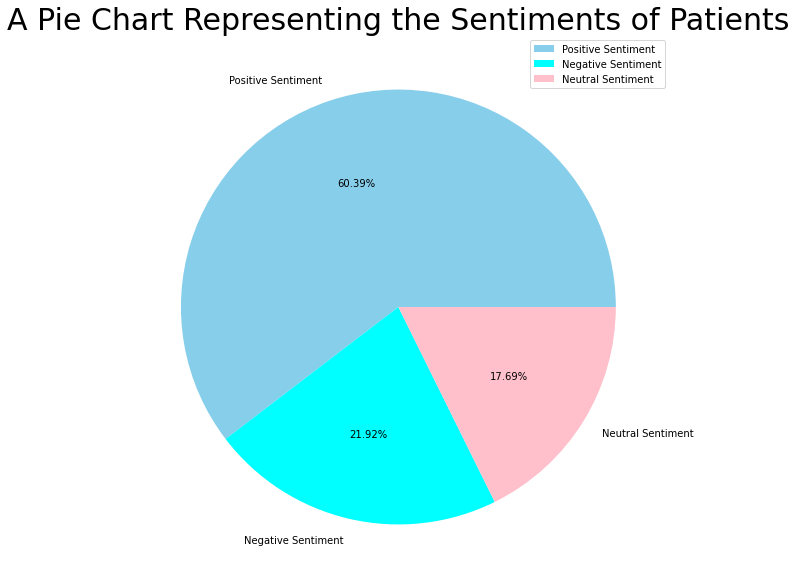

In [41]:
# a pie chart to represent the sentiments of the patients

size = [33261, 12075,9745]
colors = ['skyblue', 'cyan','pink']
labels = "Positive Sentiment","Negative Sentiment","Neutral Sentiment"
explode = [0, 0, 0]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('A Pie Chart Representing the Sentiments of Patients', fontsize = 30)
plt.legend()
plt.show()

In [42]:
drugs_data

Unnamed: 0               drugName                   condition  \
0           206461              Valsartan  LeftVentricularDysfunction   
1            95260             Guanfacine                        ADHD   
2            92703                 Lybrel                BirthControl   
3           138000              OrthoEvra                BirthControl   
4            35696  Buprenorphinenaloxone            OpiateDependence   
...            ...                    ...                         ...   
161292      191035                Campral           AlcoholDependence   
161293      127085         Metoclopramide              NauseaVomiting   
161294      187382                Orencia         RheumatoidArthritis   
161295       47128      Thyroiddesiccated          UnderactiveThyroid   
161296      215220           Lubiprostone         ConstipationChronic   

                                                   review  rating  \
0                           combination bystolic fish oil     9.0   
1       son halfway fourth week intuniv became concern...     8.0   
2       used another oral contraceptive pill cycle hap...     5.0   
3       using form birth control glad went patch month...     8.0   
4       suboxone completely turned life around feel he...     9.0   
...                                                   ...     ...   
161292  wrote report midoctober alcohol since post red...    10.0   
161293  given iv surgey immediately became anxious sit...     1.0   
161294  limited improvement month developed bad rash m...     2.0   
161295  thyroid medication year spent synthroid variou...    10.0   
161296  chronic constipation adult life tried linz wor...     9.0   

                      date  usefulCount        SIDE_EFFECTS REVIEW_SENTIMENT  
0             May 20, 2012           27      no side effect         POSITIVE  
1           April 27, 2010          192      no side effect         POSITIVE  
2        December 14, 2009           17    mild side effect          NEUTRAL  
3         November 3, 2015           10      no side effect         POSITIVE  
4        November 27, 2016           37      no side effect         POSITIVE  
...                    ...          ...                 ...              ...  
161292        May 31, 2015          125      no side effect         POSITIVE  
161293    November 1, 2011           34  severe side effect         NEGATIVE  
161294      March 15, 2014           35  severe side effect         NEGATIVE  
161295  September 19, 2015           79      no side effect         POSITIVE  
161296   December 13, 2014          116      no side effect         POSITIVE  

[160398 rows x 9 columns]

In [43]:
drugs_data.columns

Index(['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount', 'SIDE_EFFECTS', 'REVIEW_SENTIMENT'],
      dtype='object')

In [44]:
def SIDEEFFECTS(row):
    if row['SIDE_EFFECTS'] =="severe side effect":
        return ("YES")
    elif row['SIDE_EFFECTS'] == "mild side effect":
        return ("NO")
    else:
        return ("NO")

drugs_data['SIDEEFFECTS'] = drugs_data.apply(SIDEEFFECTS, axis=1)
drugs_data.head()

Unnamed: 0               drugName                   condition  \
0      206461              Valsartan  LeftVentricularDysfunction   
1       95260             Guanfacine                        ADHD   
2       92703                 Lybrel                BirthControl   
3      138000              OrthoEvra                BirthControl   
4       35696  Buprenorphinenaloxone            OpiateDependence   

                                              review  rating  \
0                      combination bystolic fish oil     9.0   
1  son halfway fourth week intuniv became concern...     8.0   
2  used another oral contraceptive pill cycle hap...     5.0   
3  using form birth control glad went patch month...     8.0   
4  suboxone completely turned life around feel he...     9.0   

                date  usefulCount      SIDE_EFFECTS REVIEW_SENTIMENT  \
0       May 20, 2012           27    no side effect         POSITIVE   
1     April 27, 2010          192    no side effect         POSITIVE   
2  December 14, 2009           17  mild side effect          NEUTRAL   
3   November 3, 2015           10    no side effect         POSITIVE   
4  November 27, 2016           37    no side effect         POSITIVE   

  SIDEEFFECTS  
0          NO  
1          NO  
2          NO  
3          NO  
4          NO

In [45]:
drugs_data.to_csv('Book2.csv')

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
labelencoder=LabelEncoder()
drugs_data[ 'RESULT' ]= labelencoder.fit_transform(drugs_data[ 'SIDEEFFECTS' ])   
drugs_data[ 'RESULT' ].unique()

array([0, 1])

In [48]:
drugs_data

Unnamed: 0               drugName                   condition  \
0           206461              Valsartan  LeftVentricularDysfunction   
1            95260             Guanfacine                        ADHD   
2            92703                 Lybrel                BirthControl   
3           138000              OrthoEvra                BirthControl   
4            35696  Buprenorphinenaloxone            OpiateDependence   
...            ...                    ...                         ...   
161292      191035                Campral           AlcoholDependence   
161293      127085         Metoclopramide              NauseaVomiting   
161294      187382                Orencia         RheumatoidArthritis   
161295       47128      Thyroiddesiccated          UnderactiveThyroid   
161296      215220           Lubiprostone         ConstipationChronic   

                                                   review  rating  \
0                           combination bystolic fish oil     9.0   
1       son halfway fourth week intuniv became concern...     8.0   
2       used another oral contraceptive pill cycle hap...     5.0   
3       using form birth control glad went patch month...     8.0   
4       suboxone completely turned life around feel he...     9.0   
...                                                   ...     ...   
161292  wrote report midoctober alcohol since post red...    10.0   
161293  given iv surgey immediately became anxious sit...     1.0   
161294  limited improvement month developed bad rash m...     2.0   
161295  thyroid medication year spent synthroid variou...    10.0   
161296  chronic constipation adult life tried linz wor...     9.0   

                      date  usefulCount        SIDE_EFFECTS REVIEW_SENTIMENT  \
0             May 20, 2012           27      no side effect         POSITIVE   
1           April 27, 2010          192      no side effect         POSITIVE   
2        December 14, 2009           17    mild side effect          NEUTRAL   
3         November 3, 2015           10      no side effect         POSITIVE   
4        November 27, 2016           37      no side effect         POSITIVE   
...                    ...          ...                 ...              ...   
161292        May 31, 2015          125      no side effect         POSITIVE   
161293    November 1, 2011           34  severe side effect         NEGATIVE   
161294      March 15, 2014           35  severe side effect         NEGATIVE   
161295  September 19, 2015           79      no side effect         POSITIVE   
161296   December 13, 2014          116      no side effect         POSITIVE   

       SIDEEFFECTS  RESULT  
0               NO       0  
1               NO       0  
2               NO       0  
3               NO       0  
4               NO       0  
...            ...     ...  
161292          NO       0  
161293         YES       1  
161294         YES       1  
161295          NO       0  
161296          NO       0  

[160398 rows x 11 columns]

In [49]:
drugs_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160398 entries, 0 to 161296
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        160398 non-null  int64  
 1   drugName          160398 non-null  object 
 2   condition         160398 non-null  object 
 3   review            160398 non-null  object 
 4   rating            160398 non-null  float64
 5   date              160398 non-null  object 
 6   usefulCount       160398 non-null  int64  
 7   SIDE_EFFECTS      160398 non-null  object 
 8   REVIEW_SENTIMENT  160398 non-null  object 
 9   SIDEEFFECTS       160398 non-null  object 
 10  RESULT            160398 non-null  int32  
dtypes: float64(1), int32(1), int64(2), object(7)
memory usage: 18.1+ MB


#  Model Building

# Logistic Regression

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

In [51]:
nbs=CountVectorizer(max_features=54741)
X = nbs.fit_transform(drugs_data.review)
y=drugs_data.RESULT

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logreg=LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [54]:
y_pred=logreg.predict(X_test)
print('Accuracy:{:.2f}'.format(logreg.score(X_test,y_test)))

Accuracy:0.86


In [55]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[23725  1443]
 [ 2935  3977]]


In [56]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92     25168
           1       0.73      0.58      0.64      6912

    accuracy                           0.86     32080
   macro avg       0.81      0.76      0.78     32080
weighted avg       0.86      0.86      0.86     32080



In [57]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [58]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print("logit_roc_auc:",logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

logit_roc_auc: 0.7590207233318029


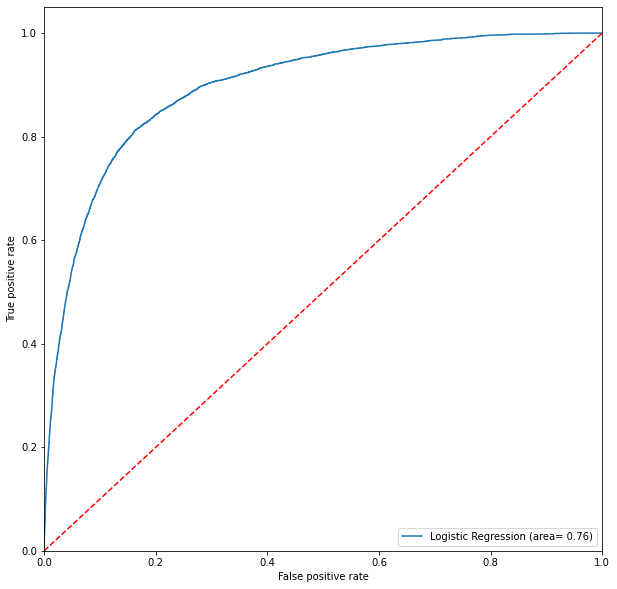

In [59]:
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area= %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 
from sklearn.tree import plot_tree

In [61]:
from sklearn.feature_extraction.text import CountVectorizer

In [62]:
nbs=CountVectorizer(max_features=54741)
X = nbs.fit_transform(drugs_data.review)
y=drugs_data.RESULT

In [63]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [65]:
prediction=model.predict(X_test)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [67]:
print('The Accuracy of train data is :',model.score(X_train,y_train))
print('The Accuracy of test data is :',model.score(X_test,y_test))

The Accuracy of train data is : 0.7860081983821443
The Accuracy of test data is : 0.7878117206982543


In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test, prediction)
print(confusion_matrix)

[[24927   241]
 [ 6566   346]]


In [69]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88     25168
           1       0.59      0.05      0.09      6912

    accuracy                           0.79     32080
   macro avg       0.69      0.52      0.49     32080
weighted avg       0.75      0.79      0.71     32080



# XGBM

In [70]:
# XGBoost model 
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [71]:
from sklearn.feature_extraction.text import CountVectorizer

In [72]:
nbs=CountVectorizer(max_features=54741)
X = nbs.fit_transform(drugs_data.review)
y=drugs_data.RESULT

In [73]:
# split data into train and test sets
seed = 7
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [74]:
# fit model no training data
xgbm = XGBClassifier()
xgbm.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [75]:
y_pred=xgbm.predict(X_test)
print('Accuracy:{:.2f}'.format(xgbm.score(X_test,y_test)))

Accuracy:0.84


In [76]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[24350   681]
 [ 4409  2640]]


In [77]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91     25031
           1       0.79      0.37      0.51      7049

    accuracy                           0.84     32080
   macro avg       0.82      0.67      0.71     32080
weighted avg       0.84      0.84      0.82     32080



# LGBM

In [78]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [79]:
from sklearn.feature_extraction.text import CountVectorizer

In [80]:
nbs=CountVectorizer(max_features=54741)
X = nbs.fit_transform(drugs_data.review)
y=drugs_data.RESULT

In [81]:
# split data into train and test sets
seed = 7
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [82]:
X_train=X_train.astype('float32')

In [83]:
y_train=y_train.astype('float32')

In [84]:
X_test=X_test.astype('float32')

In [85]:
y_test=y_test.astype('float32')

In [86]:
d_train = lgb.Dataset(X_train, label=y_train)
d_train

In [87]:
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10

In [88]:
clf = lgb.train(params, d_train, 100)

[LightGBM] [Info] Number of positive: 27799, number of negative: 100519
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 3.995131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 18312
[LightGBM] [Info] Number of data points in the train set: 128318, number of used features: 4967
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.216641 -> initscore=-1.285347
[LightGBM] [Info] Start training from score -1.285347


In [89]:
#Prediction
y_pred=clf.predict(X_test)

In [90]:
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
accuracy

0.7802680798004987

# SVM

In [91]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [92]:
nbs=CountVectorizer(max_features=54741)
X = nbs.fit_transform(drugs_data.review)
y=drugs_data.RESULT

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.2)

In [94]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [95]:
nbs2 = LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001,C=0.55, multi_class='ovr', fit_intercept=True, intercept_scaling=1,random_state=42)

In [96]:
nbs2.fit(X_train, y_train)

LinearSVC(C=0.55, random_state=42)

In [101]:
print('accuracy on train set %s' % accuracy_score(y_train, nbs2.predict(X_train)))
print('accuracy on test set %s' % accuracy_score(y_pred, y_test))

accuracy on train set 0.9323633473090291
accuracy on test set 0.8736284289276808


In [97]:
y_pred = nbs2.predict(X_test)

In [102]:
print(confusion_matrix(y_pred,y_test))

[[23604  2548]
 [ 1506  4422]]


In [99]:
report = classification_report(y_test, y_pred)
print('Classification Report Logistic regression: \n', report)

Classification Report Logistic regression: 
               precision    recall  f1-score   support

           0       0.90      0.94      0.92     25110
           1       0.75      0.63      0.69      6970

    accuracy                           0.87     32080
   macro avg       0.82      0.79      0.80     32080
weighted avg       0.87      0.87      0.87     32080

